<a href="https://colab.research.google.com/github/asifkonokayan/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)


In [ ]:

# Load dataset (update path if needed)
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

print("First rows of dataset:")
print(df.head())

print("\nShape of dataset:", df.shape)
print(df.isnull().sum().sum(), "missing values in dataset")

# Features and Target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining size:", X_train.shape, "Testing size:", X_test.shape)


First rows of dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V

Build Pipelines

In [ ]:


pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    ))
])

pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(
        class_weight='balanced',
        random_state=42
    ))
])


Evaluate KNN Classifier


================ KNN (Baseline) ================
Accuracy: 0.9994
Precision: 0.9153
Recall: 0.7297
F1 Score: 0.8120
ROC-AUC: 0.9188
PR-AUC: 0.8007

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



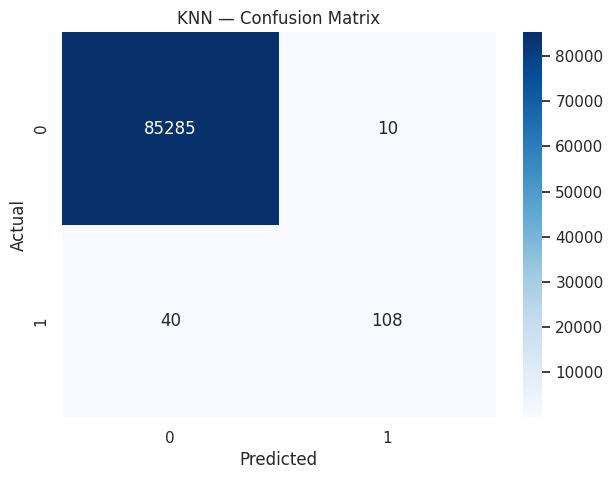

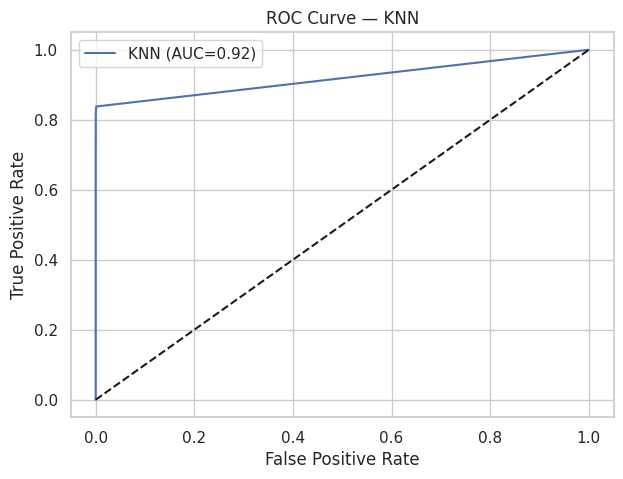

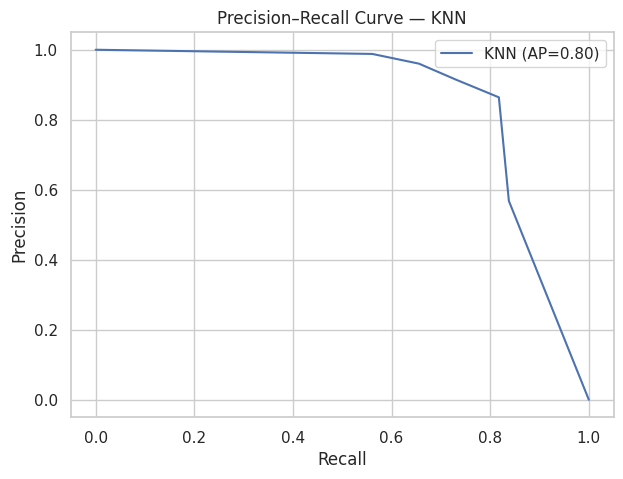

In [ ]:


pipe_knn.fit(X_train, y_train)
y_score_knn = pipe_knn.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred_knn = (y_score_knn >= threshold).astype(int)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, zero_division=0)
rec_knn = recall_score(y_test, y_pred_knn, zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, zero_division=0)
roc_auc_knn = auc(*roc_curve(y_test, y_score_knn)[:2])
pr_auc_knn = average_precision_score(y_test, y_score_knn)

print("\n================ KNN (Baseline) ================")
print(f"Accuracy: {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall: {rec_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")
print(f"PR-AUC: {pr_auc_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC={roc_auc_knn:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve — KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

pr_knn, rc_knn, _ = precision_recall_curve(y_test, y_score_knn)
plt.plot(rc_knn, pr_knn, label=f"KNN (AP={pr_auc_knn:.2f})")
plt.title("Precision–Recall Curve — KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Evaluate Random Forest Classifier


================ Random Forest (Baseline) ================
Accuracy: 0.9995
Precision: 0.9722
Recall: 0.7095
F1 Score: 0.8203
ROC-AUC: 0.9333
PR-AUC: 0.8116

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



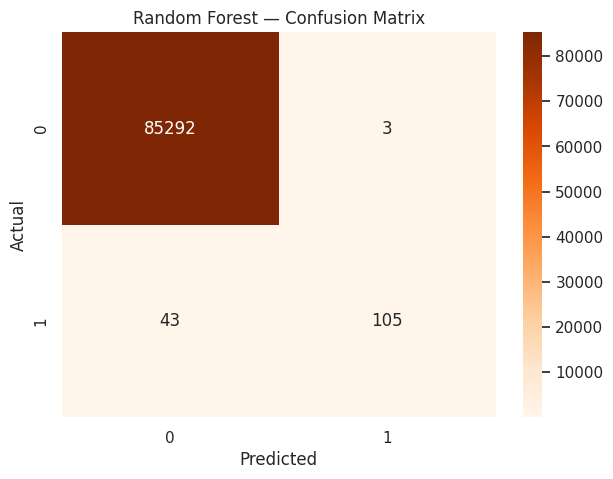

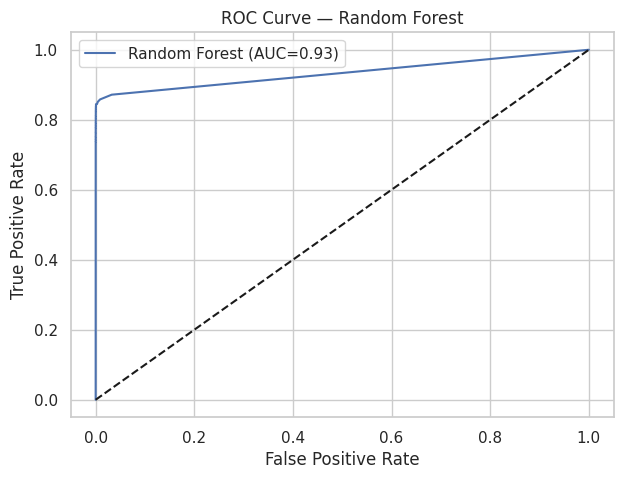

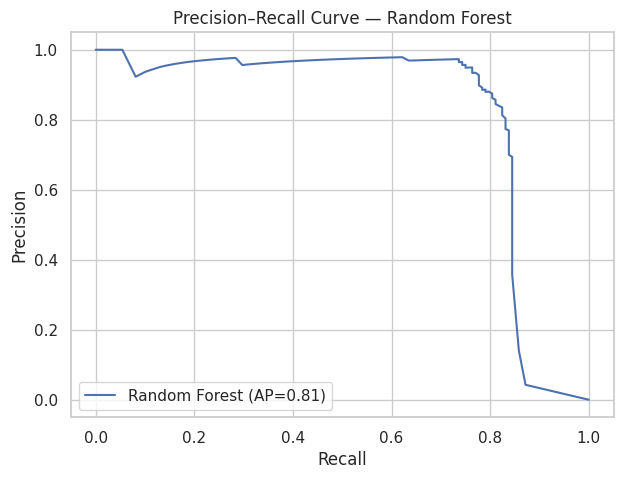

In [ ]:


pipe_rf.fit(X_train, y_train)
y_score_rf = pipe_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_score_rf >= 0.5).astype(int)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=0)
rec_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
roc_auc_rf = auc(*roc_curve(y_test, y_score_rf)[:2])
pr_auc_rf = average_precision_score(y_test, y_score_rf)

print("\n================ Random Forest (Baseline) ================")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"PR-AUC: {pr_auc_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve — Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

pr_rf, rc_rf, _ = precision_recall_curve(y_test, y_score_rf)
plt.plot(rc_rf, pr_rf, label=f"Random Forest (AP={pr_auc_rf:.2f})")
plt.title("Precision–Recall Curve — Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


 Evaluate Naive Bayes Classifier


================ Naive Bayes (Baseline) ================
Accuracy: 0.9780
Precision: 0.0604
Recall: 0.8041
F1 Score: 0.1124
ROC-AUC: 0.9552
PR-AUC: 0.0809

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.80      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.55     85443
weighted avg       1.00      0.98      0.99     85443



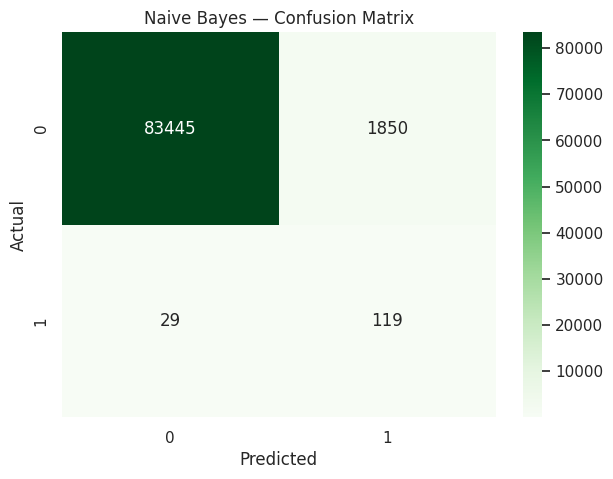

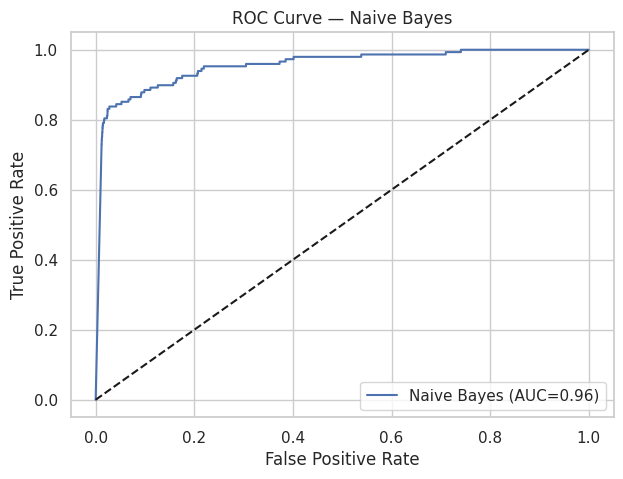

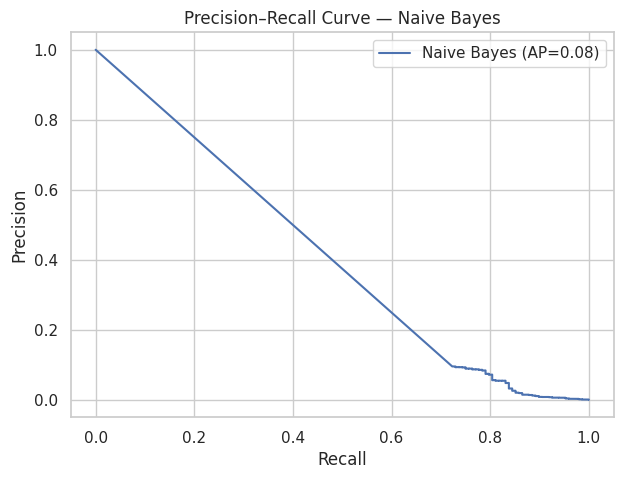

In [ ]:


pipe_nb.fit(X_train, y_train)
y_score_nb = pipe_nb.predict_proba(X_test)[:, 1]
y_pred_nb = (y_score_nb >= 0.5).astype(int)

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb, zero_division=0)
rec_nb = recall_score(y_test, y_pred_nb, zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, zero_division=0)
roc_auc_nb = auc(*roc_curve(y_test, y_score_nb)[:2])
pr_auc_nb = average_precision_score(y_test, y_score_nb)

print("\n================ Naive Bayes (Baseline) ================")
print(f"Accuracy: {acc_nb:.4f}")
print(f"Precision: {prec_nb:.4f}")
print(f"Recall: {rec_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"ROC-AUC: {roc_auc_nb:.4f}")
print(f"PR-AUC: {pr_auc_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, zero_division=0))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={roc_auc_nb:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve — Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

pr_nb, rc_nb, _ = precision_recall_curve(y_test, y_score_nb)
plt.plot(rc_nb, pr_nb, label=f"Naive Bayes (AP={pr_auc_nb:.2f})")
plt.title("Precision–Recall Curve — Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Evaluate Decision Tree Classifier


================ Decision Tree (Baseline) ================
Accuracy: 0.9991
Precision: 0.7734
Recall: 0.6689
F1 Score: 0.7174
ROC-AUC: 0.8343
PR-AUC: 0.5179

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.67      0.72       148

    accuracy                           1.00     85443
   macro avg       0.89      0.83      0.86     85443
weighted avg       1.00      1.00      1.00     85443



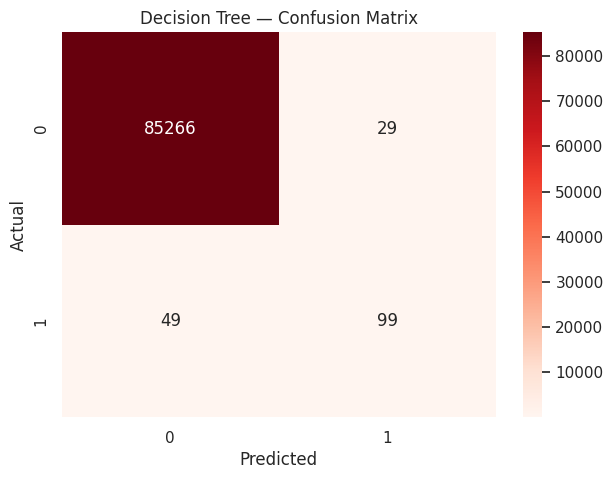

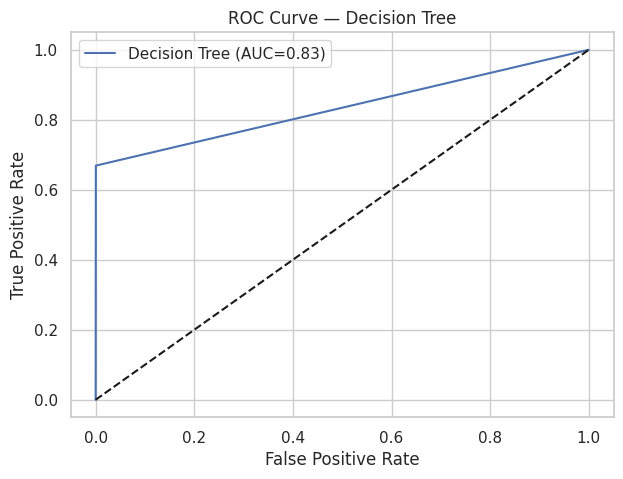

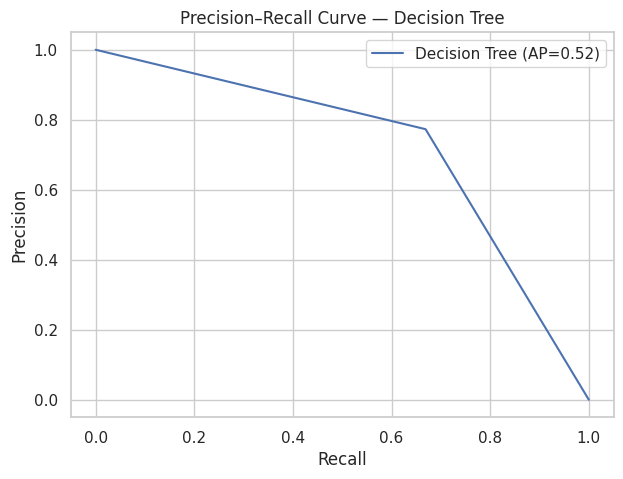

In [ ]:


pipe_dt.fit(X_train, y_train)
y_score_dt = pipe_dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_score_dt >= 0.5).astype(int)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)
roc_auc_dt = auc(*roc_curve(y_test, y_score_dt)[:2])
pr_auc_dt = average_precision_score(y_test, y_score_dt)

print("\n================ Decision Tree (Baseline) ================")
print(f"Accuracy: {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall: {rec_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")
print(f"PR-AUC: {pr_auc_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.title("Decision Tree — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_dt:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve — Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

pr_dt, rc_dt, _ = precision_recall_curve(y_test, y_score_dt)
plt.plot(rc_dt, pr_dt, label=f"Decision Tree (AP={pr_auc_dt:.2f})")
plt.title("Precision–Recall Curve — Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Cross-Validation

In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_score_report(pipeline, name):
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'pr_auc': 'average_precision'
    }
    cv_res = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    print(f"\n---- {name} — 5-Fold CV (mean ± std) ----")
    for k in scoring.keys():
        print(f"{k:>10}: {cv_res['test_'+k].mean():.4f} ± {cv_res['test_'+k].std():.4f}")

cv_score_report(pipe_knn, 'KNN (Baseline)')
cv_score_report(pipe_rf, 'Random Forest (Baseline)')
cv_score_report(pipe_nb, 'Naive Bayes (Baseline)')
cv_score_report(pipe_dt, 'Decision Tree (Baseline)')



---- KNN (Baseline) — 5-Fold CV (mean ± std) ----
  accuracy: 0.9995 ± 0.0001
 precision: 0.9374 ± 0.0455
    recall: 0.7744 ± 0.0244
        f1: 0.8479 ± 0.0302
   roc_auc: 0.9227 ± 0.0086
    pr_auc: 0.8085 ± 0.0250

---- Random Forest (Baseline) — 5-Fold CV (mean ± std) ----
  accuracy: 0.9995 ± 0.0001
 precision: 0.9596 ± 0.0308
    recall: 0.7642 ± 0.0195
        f1: 0.8507 ± 0.0226
   roc_auc: 0.9562 ± 0.0097
    pr_auc: 0.8524 ± 0.0259

---- Naive Bayes (Baseline) — 5-Fold CV (mean ± std) ----
  accuracy: 0.9779 ± 0.0009
 precision: 0.0618 ± 0.0033
    recall: 0.8293 ± 0.0177
        f1: 0.1150 ± 0.0059
   roc_auc: 0.9609 ± 0.0063
    pr_auc: 0.0861 ± 0.0060

---- Decision Tree (Baseline) — 5-Fold CV (mean ± std) ----
  accuracy: 0.9992 ± 0.0001
 precision: 0.7728 ± 0.0512
    recall: 0.7377 ± 0.0438
        f1: 0.7539 ± 0.0386
   roc_auc: 0.8687 ± 0.0219
    pr_auc: 0.5714 ± 0.0565


Confusion Matrix → Metrics Helper

In [ ]:

def metrics_from_confusion(cm):
    TN, FP, FN, TP = cm.ravel()

    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1        = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\n===== Metrics from Confusion Matrix =====")
    print(f"TN (True Negatives): {TN}")
    print(f"FP (False Positives): {FP}")
    print(f"FN (False Negatives): {FN}")
    print(f"TP (True Positives): {TP}\n")

    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")

    return {
        "TN": TN, "FP": FP, "FN": FN, "TP": TP,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }


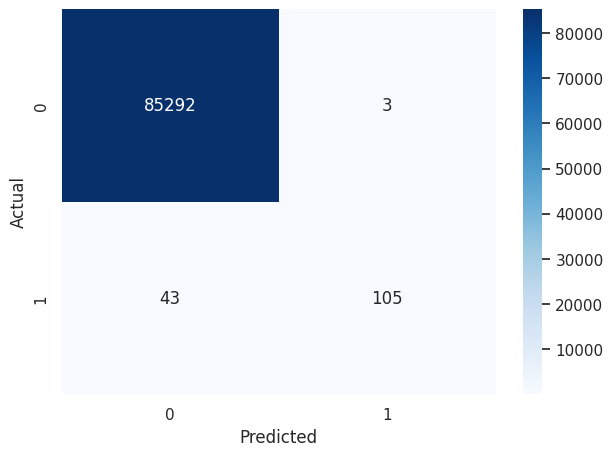


===== Metrics from Confusion Matrix =====
TN (True Negatives): 85292
FP (False Positives): 3
FN (False Negatives): 43
TP (True Positives): 105

Accuracy : 0.9995
Precision: 0.9722
Recall   : 0.7095
F1 Score : 0.8203


{'TN': np.int64(85292),
 'FP': np.int64(3),
 'FN': np.int64(43),
 'TP': np.int64(105),
 'Accuracy': np.float64(0.9994616293903538),
 'Precision': np.float64(0.9722222222222222),
 'Recall': np.float64(0.7094594594594594),
 'F1': np.float64(0.8203125)}

In [ ]:
pipe_rf.fit(X_train, y_train)

# Predictions
y_pred = pipe_rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

metrics_from_confusion(cm)



Final Comparison Table


Final Results:
           Model  Accuracy  Precision    Recall        F1   ROC_AUC    PR_AUC
0            KNN  0.999415   0.915254  0.729730  0.812030  0.918789  0.800736
1  Random Forest  0.999462   0.972222  0.709459  0.820312  0.933333  0.811625
2    Naive Bayes  0.978009   0.060437  0.804054  0.112423  0.955226  0.080896
3  Decision Tree  0.999087   0.773438  0.668919  0.717391  0.834289  0.517940


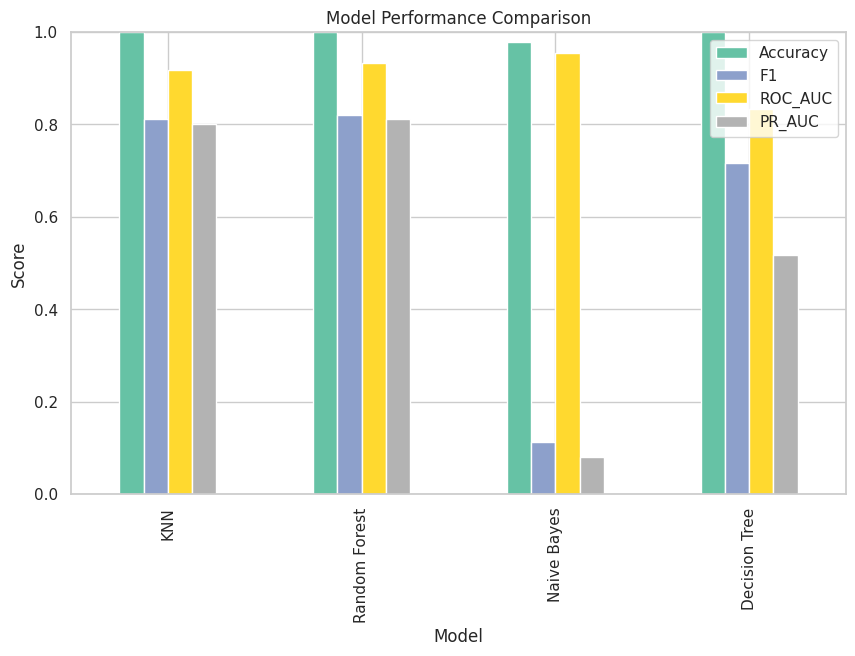

In [ ]:

df_results = pd.DataFrame({
    "Model": ["KNN", "Random Forest", "Naive Bayes", "Decision Tree"],
    "Accuracy": [acc_knn, acc_rf, acc_nb, acc_dt],
    "Precision": [prec_knn, prec_rf, prec_nb, prec_dt],
    "Recall": [rec_knn, rec_rf, rec_nb, rec_dt],
    "F1": [f1_knn, f1_rf, f1_nb, f1_dt],
    "ROC_AUC": [roc_auc_knn, roc_auc_rf, roc_auc_nb, roc_auc_dt],
    "PR_AUC": [pr_auc_knn, pr_auc_rf, pr_auc_nb, pr_auc_dt]
})

print("\nFinal Results:")
print(df_results)

df_results.set_index("Model")[["Accuracy","F1","ROC_AUC","PR_AUC"]].plot(
    kind='bar', figsize=(10,6), colormap="Set2"
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()
